In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
test.isnull().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


## Lets handle Nan values first

In [6]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

In [7]:
train_copy.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [8]:
train_positive = train_copy.loc[train_copy['target'] == 1]

In [9]:
train_negative = train_copy.loc[train_copy['target'] == 0]

In [10]:
train_positive.isnull().sum()/train_positive['id'].shape[0]

id                0.000000
target            0.000000
ps_ind_01         0.000000
ps_ind_02_cat     0.001844
ps_ind_03         0.000000
ps_ind_04_cat     0.001521
ps_ind_05_cat     0.022310
ps_ind_06_bin     0.000000
ps_ind_07_bin     0.000000
ps_ind_08_bin     0.000000
ps_ind_09_bin     0.000000
ps_ind_10_bin     0.000000
ps_ind_11_bin     0.000000
ps_ind_12_bin     0.000000
ps_ind_13_bin     0.000000
ps_ind_14         0.000000
ps_ind_15         0.000000
ps_ind_16_bin     0.000000
ps_ind_17_bin     0.000000
ps_ind_18_bin     0.000000
ps_reg_01         0.000000
ps_reg_02         0.000000
ps_reg_03         0.141053
ps_car_01_cat     0.001567
ps_car_02_cat     0.000000
ps_car_03_cat     0.619987
ps_car_04_cat     0.000000
ps_car_05_cat     0.389601
ps_car_06_cat     0.000000
ps_car_07_cat     0.041394
ps_car_08_cat     0.000000
ps_car_09_cat     0.002397
ps_car_10_cat     0.000000
ps_car_11_cat     0.000000
ps_car_11         0.000000
ps_car_12         0.000000
ps_car_13         0.000000
p

In [11]:
train_negative.isnull().sum()/train_negative['id'].shape[0]

id                0.000000
target            0.000000
ps_ind_01         0.000000
ps_ind_02_cat     0.000307
ps_ind_03         0.000000
ps_ind_04_cat     0.000087
ps_ind_05_cat     0.009285
ps_ind_06_bin     0.000000
ps_ind_07_bin     0.000000
ps_ind_08_bin     0.000000
ps_ind_09_bin     0.000000
ps_ind_10_bin     0.000000
ps_ind_11_bin     0.000000
ps_ind_12_bin     0.000000
ps_ind_13_bin     0.000000
ps_ind_14         0.000000
ps_ind_15         0.000000
ps_ind_16_bin     0.000000
ps_ind_17_bin     0.000000
ps_ind_18_bin     0.000000
ps_reg_01         0.000000
ps_reg_02         0.000000
ps_reg_03         0.182578
ps_car_01_cat     0.000127
ps_car_02_cat     0.000009
ps_car_03_cat     0.693581
ps_car_04_cat     0.000000
ps_car_05_cat     0.450028
ps_car_06_cat     0.000000
ps_car_07_cat     0.018467
ps_car_08_cat     0.000000
ps_car_09_cat     0.000901
ps_car_10_cat     0.000000
ps_car_11_cat     0.000000
ps_car_11         0.000009
ps_car_12         0.000002
ps_car_13         0.000000
p

In [12]:
plt.plot(range(59),(train_positive.isnull().sum()/train_positive['id'].shape[0]).as_matrix(),color='r')

In [13]:
plt.plot(range(59),(train_negative.isnull().sum()/train_negative['id'].shape[0]).as_matrix(),color='b')

In [14]:
plt.xlabel('Column number')

In [15]:
plt.ylabel('No of NAs')

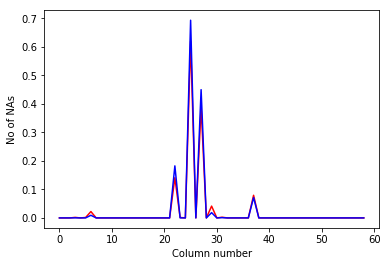

In [16]:
plt.show()

In [17]:
train_positive['ps_ind_02_cat'].value_counts().idxmax()

1.0

In [18]:
train_negative['ps_ind_02_cat'].value_counts().idxmax()

1.0

In [19]:
train_positive['ps_ind_02_cat'].fillna(train_positive['ps_ind_02_cat'].value_counts().idxmax())

9         1.0
19        1.0
28        2.0
39        1.0
41        2.0
65        1.0
87        1.0
108       1.0
191       1.0
224       2.0
249       2.0
251       1.0
264       2.0
266       1.0
293       1.0
297       1.0
305       1.0
328       1.0
339       2.0
380       2.0
384       1.0
460       1.0
518       1.0
528       1.0
535       1.0
559       1.0
610       2.0
631       2.0
640       1.0
647       3.0
688       2.0
702       1.0
845       1.0
858       1.0
864       1.0
925       1.0
1019      1.0
1030      2.0
1039      2.0
1103      1.0
1106      1.0
1136      1.0
1163      1.0
1166      1.0
1168      2.0
1185      4.0
1263      1.0
1279      1.0
1352      1.0
1362      1.0
1370      1.0
1387      2.0
1404      1.0
1407      2.0
1417      3.0
1464      1.0
1466      1.0
1569      1.0
1586      1.0
1607      2.0
1630      1.0
1648      1.0
1661      2.0
1694      2.0
1760      4.0
1768      2.0
1771      1.0
1777      1.0
1781      1.0
1823      1.0
1840      1.0
1847  

In [20]:
train_copy['ps_ind_02_cat']=train_copy['ps_ind_02_cat'].fillna(train_copy['ps_ind_02_cat'].value_counts().idxmax())

In [21]:
train_copy['ps_ind_04_cat'] = train_copy['ps_ind_04_cat'].fillna(train_copy['ps_ind_04_cat'].value_counts().idxmax())
train_copy['ps_ind_05_cat']=train_copy['ps_ind_05_cat'].fillna(train_copy['ps_ind_05_cat'].value_counts().idxmax())
train_copy['ps_car_01_cat']=train_copy['ps_car_01_cat'].fillna(train_copy['ps_car_01_cat'].value_counts().idxmax())
train_copy['ps_car_02_cat']=train_copy['ps_car_02_cat'].fillna(train_copy['ps_car_02_cat'].value_counts().idxmax())
train_copy['ps_car_03_cat']=train_copy['ps_car_03_cat'].fillna(train_copy['ps_car_03_cat'].value_counts().idxmax())
train_copy['ps_car_05_cat']=train_copy['ps_car_05_cat'].fillna(train_copy['ps_car_05_cat'].value_counts().idxmax())
train_copy['ps_car_07_cat']=train_copy['ps_car_07_cat'].fillna(train_copy['ps_car_07_cat'].value_counts().idxmax())
train_copy['ps_car_09_cat']=train_copy['ps_car_09_cat'].fillna(train_copy['ps_car_09_cat'].value_counts().idxmax())

In [22]:
train_copy['ps_reg_03']=train_copy['ps_reg_03'].fillna(train_copy['ps_reg_03'].mean())
train_copy['ps_car_14']=train_copy['ps_car_14'].fillna(train_copy['ps_car_14'].mean())
train_copy['ps_car_11']=train_copy['ps_car_11'].fillna(train_copy['ps_car_11'].mean())
train_copy['ps_car_12']=train_copy['ps_car_12'].fillna(train_copy['ps_car_12'].mean())

In [23]:
train = train_copy

In [24]:
test_copy = test
test_copy = test_copy.replace(-1, np.NaN)

In [25]:
test_copy.isnull().sum()

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [26]:
test_copy['ps_ind_02_cat']=test_copy['ps_ind_02_cat'].fillna(test_copy['ps_ind_02_cat'].value_counts().idxmax())
test_copy['ps_ind_04_cat'] = test_copy['ps_ind_04_cat'].fillna(test_copy['ps_ind_04_cat'].value_counts().idxmax())
test_copy['ps_ind_05_cat']=test_copy['ps_ind_05_cat'].fillna(test_copy['ps_ind_05_cat'].value_counts().idxmax())
test_copy['ps_car_01_cat']=test_copy['ps_car_01_cat'].fillna(test_copy['ps_car_01_cat'].value_counts().idxmax())
test_copy['ps_car_02_cat']=test_copy['ps_car_02_cat'].fillna(test_copy['ps_car_02_cat'].value_counts().idxmax())
test_copy['ps_car_03_cat']=test_copy['ps_car_03_cat'].fillna(test_copy['ps_car_03_cat'].value_counts().idxmax())
test_copy['ps_car_05_cat']=test_copy['ps_car_05_cat'].fillna(test_copy['ps_car_05_cat'].value_counts().idxmax())
test_copy['ps_car_07_cat']=test_copy['ps_car_07_cat'].fillna(test_copy['ps_car_07_cat'].value_counts().idxmax())
test_copy['ps_car_09_cat']=test_copy['ps_car_09_cat'].fillna(test_copy['ps_car_09_cat'].value_counts().idxmax())
test_copy['ps_reg_03']=test_copy['ps_reg_03'].fillna(test_copy['ps_reg_03'].mean())
test_copy['ps_car_14']=test_copy['ps_car_14'].fillna(test_copy['ps_car_14'].mean())
test_copy['ps_car_11']=test_copy['ps_car_11'].fillna(test_copy['ps_car_11'].mean())
test_copy['ps_car_12']=test_copy['ps_car_12'].fillna(test_copy['ps_car_12'].mean())

In [27]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [28]:
train['target']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        1
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        1
40        0
41        1
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        1
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83  

In [29]:
input_train=pd.DataFrame(train,columns = ['ps_car_13','ps_ind_05_cat','ps_reg_03','ps_ind_17_bin','ps_reg_02','ps_ind_03','ps_car_07_cat','ps_car_04_cat','ps_car_01_cat','ps_car_12','ps_car_14','ps_car_15'])

In [30]:
input_test = pd.DataFrame(test_copy,columns = ['ps_car_13','ps_ind_05_cat','ps_reg_03','ps_ind_17_bin','ps_reg_02','ps_ind_03','ps_car_07_cat','ps_car_04_cat','ps_car_01_cat','ps_car_12','ps_car_14','ps_car_15'])

In [31]:
list(train)

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [33]:
from sklearn import svm
clf = svm.SVC(kernel='poly')

In [34]:
input_train = pd.concat([input_train,input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1],input_train.loc[train_copy['target'] == 1]])
train = pd.concat([train,train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1],train.loc[train_copy['target'] == 1]])

In [35]:
print input_train.shape[0]
print train.shape[0]
print input_test.shape[0]

790458
790458
892816


In [ ]:
clf.fit(input_train.as_matrix(),train['target'].as_matrix())

In [ ]:
prediction = clf.predict(input_test.as_matrix())

In [ ]:
prediction

In [ ]:
np.savetxt('pred_SVM.out', prediction, delimiter=',') 

In [ ]:
input_train.loc[train_copy['target'] == 1]